#### Ensure gruyere files can be used

In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('../../gruyere')

In [2]:
import kernex as kex
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from gruyere.brushes import notched_square_brush, circular_brush, show_mask
from gruyere.design import _initialize_design, Design
from gruyere.generator import generate_design, _step_generator
from gruyere.states import DesignState

from gruyere.generator2 import generate_design as gen_design2

from inverse_design.local_generator import generate_feasible_design_mask as gen_local
from inverse_design.conditional_generator import generate_feasible_design_mask_ as gen_opt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

# We generate an initial random design 

In [3]:
## We initalize a random array
size = 50

key = jax.random.PRNGKey(42)
latent_design = jax.random.uniform(key, (size,size)) * 2 - 1

In [4]:
## We define the transform function
beta = 4
def transform(design, brush, beta=1):
    @jax.jit
    @kex.kmap(kernel_size=brush.shape, padding=('same','same'))
    def brush_conv(x):
        return jnp.sum(x * brush)

    return jnp.tanh(beta * brush_conv(design))

# Figure 2. (a)  diameter-13 circular brush

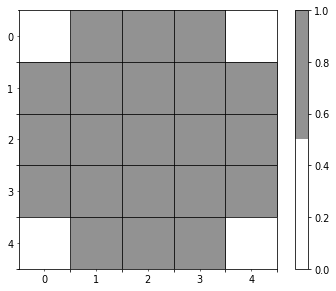

In [5]:
circ_brush = circular_brush(5)
# circ_brush = circular_brush(3)
# circ_brush = circular_brush(13)
show_mask(circ_brush);

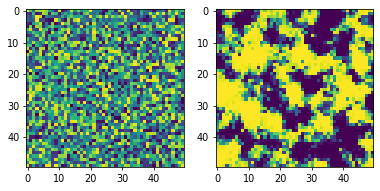

In [6]:
transformed_design1 = transform(latent_design, circ_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

# Beginning of the test

In [7]:
des_gruyere1 = generate_design(transformed_design1, circ_brush);

1 / 2500 2479
2 / 2500 2458
3 / 2500 2451
4 / 2500 2446
5 / 2500 2444
6 / 2500 2444
7 / 2500 2423
8 / 2500 2419
9 / 2500 2414
10 / 2500 2413
11 / 2500 2412
12 / 2500 2391
13 / 2500 2389
14 / 2500 2385
15 / 2500 2384
16 / 2500 2380
17 / 2500 2379
18 / 2500 2375
19 / 2500 2354
20 / 2500 2352
21 / 2500 2348
22 / 2500 2331
23 / 2500 2330
24 / 2500 2321
25 / 2500 2320
26 / 2500 2318
27 / 2500 2313
28 / 2500 2292
29 / 2500 2289
30 / 2500 2279
31 / 2500 2278
32 / 2500 2257
33 / 2500 2250
34 / 2500 2245
35 / 2500 2244
36 / 2500 2242
37 / 2500 2237
38 / 2500 2232
39 / 2500 2225
40 / 2500 2221
41 / 2500 2219
42 / 2500 2217
43 / 2500 2214
44 / 2500 2214
45 / 2500 2212
46 / 2500 2212
47 / 2500 2201
48 / 2500 2200
49 / 2500 2199
50 / 2500 2178
51 / 2500 2157
52 / 2500 2145
53 / 2500 2145
54 / 2500 2124
55 / 2500 2110
56 / 2500 2109
57 / 2500 2106
58 / 2500 2106
59 / 2500 2105
60 / 2500 2104
61 / 2500 2099
62 / 2500 2095
63 / 2500 2094
64 / 2500 2073
65 / 2500 2071
66 / 2500 2069
67 / 2500 2067
68 /

554 / 2500 115
555 / 2500 113
556 / 2500 112
557 / 2500 110
558 / 2500 106
559 / 2500 106
560 / 2500 105
561 / 2500 104
562 / 2500 101
563 / 2500 101
564 / 2500 100
565 / 2500 99
566 / 2500 98
567 / 2500 96
568 / 2500 95
569 / 2500 94
570 / 2500 93
571 / 2500 90
572 / 2500 90
573 / 2500 89
574 / 2500 86
575 / 2500 85
576 / 2500 79
577 / 2500 79
578 / 2500 78
579 / 2500 76
580 / 2500 65
581 / 2500 60
582 / 2500 52
583 / 2500 49
584 / 2500 48
585 / 2500 47
586 / 2500 46
587 / 2500 42
588 / 2500 40
589 / 2500 39
590 / 2500 38
591 / 2500 37
592 / 2500 36
593 / 2500 34
594 / 2500 31
595 / 2500 30
596 / 2500 23
597 / 2500 21
598 / 2500 18
599 / 2500 16
600 / 2500 14
601 / 2500 12
602 / 2500 11
603 / 2500 8
604 / 2500 7
605 / 2500 6
606 / 2500 5
607 / 2500 4
608 / 2500 3
609 / 2500 2
610 / 2500 1
611 / 2500 0
Design finished within 611steps !


In [8]:
des_gruyere2 = gen_design2(transformed_design1, circ_brush);

1 / 2500 2479
2 / 2500 2458
3 / 2500 2451
4 / 2500 2449
5 / 2500 2444
6 / 2500 2423
7 / 2500 2419
8 / 2500 2414
9 / 2500 2413
10 / 2500 2412
11 / 2500 2391
12 / 2500 2389
13 / 2500 2385
14 / 2500 2384
15 / 2500 2380
16 / 2500 2379
17 / 2500 2375
18 / 2500 2354
19 / 2500 2352
20 / 2500 2348
21 / 2500 2344
22 / 2500 2340
23 / 2500 2335
24 / 2500 2334
25 / 2500 2331
26 / 2500 2329
27 / 2500 2321
28 / 2500 2321
29 / 2500 2319
30 / 2500 2314
31 / 2500 2293
32 / 2500 2290
33 / 2500 2287
34 / 2500 2285
35 / 2500 2281
36 / 2500 2279
37 / 2500 2258
38 / 2500 2251
39 / 2500 2247
40 / 2500 2245
41 / 2500 2240
42 / 2500 2235
43 / 2500 2228
44 / 2500 2224
45 / 2500 2221
46 / 2500 2221
47 / 2500 2219
48 / 2500 2218
49 / 2500 2207
50 / 2500 2206
51 / 2500 2205
52 / 2500 2184
53 / 2500 2163
54 / 2500 2156
55 / 2500 2150
56 / 2500 2148
57 / 2500 2127
58 / 2500 2123
59 / 2500 2119
60 / 2500 2114
61 / 2500 2107
62 / 2500 2106
63 / 2500 2105
64 / 2500 2100
65 / 2500 2096
66 / 2500 2095
67 / 2500 2074
68 /

542 / 2500 177
543 / 2500 177
544 / 2500 175
545 / 2500 173
546 / 2500 173
547 / 2500 170
548 / 2500 167
549 / 2500 165
550 / 2500 165
551 / 2500 164
552 / 2500 162
553 / 2500 161
554 / 2500 160
555 / 2500 154
556 / 2500 150
557 / 2500 150
558 / 2500 147
559 / 2500 147
560 / 2500 144
561 / 2500 143
562 / 2500 125
563 / 2500 116
564 / 2500 112
565 / 2500 112
566 / 2500 110
567 / 2500 106
568 / 2500 104
569 / 2500 100
570 / 2500 99
571 / 2500 97
572 / 2500 96
573 / 2500 92
574 / 2500 92
575 / 2500 91
576 / 2500 88
577 / 2500 88
578 / 2500 87
579 / 2500 86
580 / 2500 85
581 / 2500 82
582 / 2500 82
583 / 2500 81
584 / 2500 79
585 / 2500 78
586 / 2500 76
587 / 2500 65
588 / 2500 60
589 / 2500 57
590 / 2500 55
591 / 2500 53
592 / 2500 52
593 / 2500 51
594 / 2500 50
595 / 2500 44
596 / 2500 42
597 / 2500 41
598 / 2500 40
599 / 2500 39
600 / 2500 38
601 / 2500 36
602 / 2500 33
603 / 2500 30
604 / 2500 29
605 / 2500 28
606 / 2500 21
607 / 2500 19
608 / 2500 16
609 / 2500 14
610 / 2500 12
611 / 

In [22]:
from skimage.morphology import erosion, dilation

des_g1_ero_dil = dilation(erosion(des_gruyere1.x, circ_brush), circ_brush)
des_g1_dil_ero = -dilation(erosion(-des_gruyere1.x, circ_brush), circ_brush)
#des_g1_dil_ero = dilation(erosion(des_gruyere1.x, circ_brush), circ_brush)

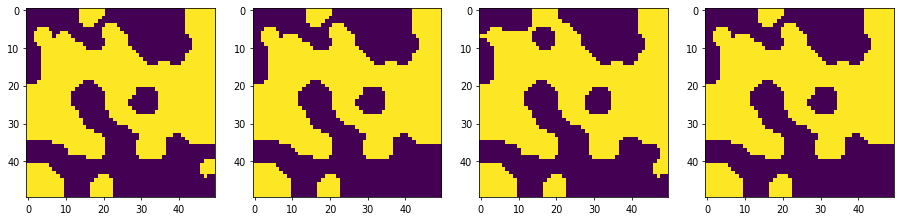

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(4*4,4))
ax[0].imshow(des_gruyere1.x);
ax[1].imshow(des_g1_ero_dil);
ax[2].imshow(des_g1_dil_ero);
ax[3].imshow((des_g1_ero_dil == 1) & (des_g1_dil_ero == 1));

In [9]:
des_opt_ru = gen_opt(transformed_design1, circ_brush, 'rust')

In [36]:
des_g1_ero_dil = dilation(erosion(des_gruyere2.x, circ_brush), circ_brush)
des_g1_dil_ero = -dilation(erosion(-des_gruyere2.x, circ_brush), circ_brush)
#des_g1_dil_ero = dilation(erosion(des_gruyere1.x, circ_brush), circ_brush)
des_g1_dil_ero = erosion(dilation(des_gruyere2.x, circ_brush), circ_brush)

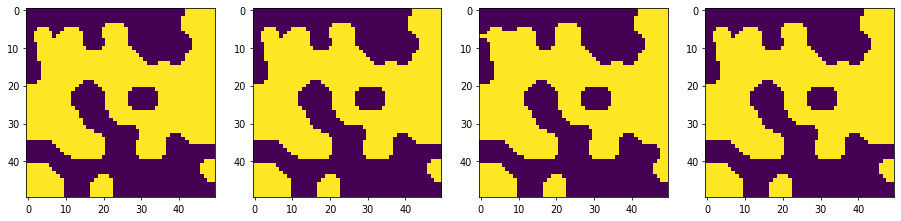

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(4*4,4))
ax[0].imshow(des_gruyere2.x);
ax[1].imshow(des_g1_ero_dil);
ax[2].imshow(des_g1_dil_ero);
ax[3].imshow((des_g1_ero_dil == 1) & (des_g1_dil_ero == 1));

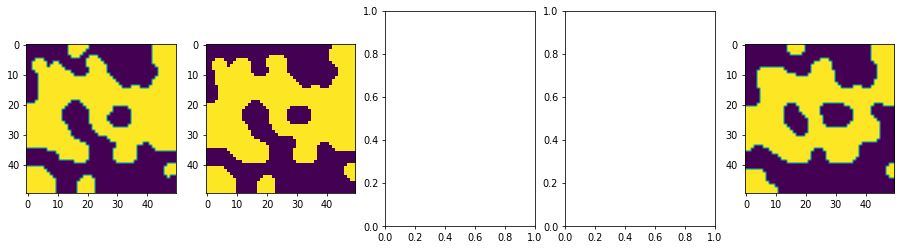

In [31]:
fig, ax = plt.subplots(1, 5, figsize=(4*4,4))
ax[0].imshow(des_gruyere1.x);
#ax[1].imshow(des_gruyere2.x);
ax[1].imshow(des_gruyere2.x);
ax[4].imshow(des_opt_ru);

In [12]:
raise ValueError

In [38]:
des_local = gen_local(transformed_design1, circ_brush)

In [39]:
des_opt_py = gen_opt(transformed_design1, circ_brush, 'python')

In [40]:
des_opt_ru = gen_opt(transformed_design1, circ_brush, 'rust')

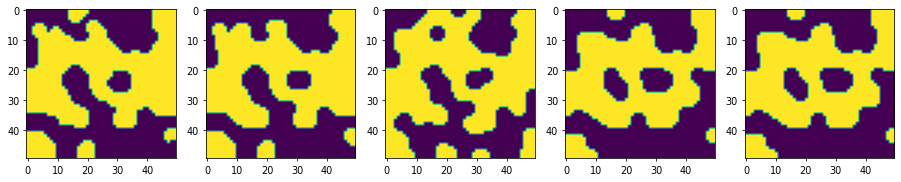

In [41]:
fig, ax = plt.subplots(1, 5, figsize=(4*4,4))
ax[0].imshow(des_gruyere1.x);
ax[1].imshow(des_gruyere2.x);
ax[2].imshow(des_local);
ax[3].imshow(des_opt_py);
ax[4].imshow(des_opt_ru);